In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os

from sklearn.linear_model import LinearRegression

In [2]:
_data_dir = '/media/STORAGE/EEG'

In [38]:
patient = 'zhouchen'
_count = loadmat(os.path.join(_data_dir, 'entrain_count', '%s_entrain_1-5.mat'%patient))['result']

_loc = pd.read_csv(os.path.join(_data_dir, 'electrode_layout', 'layout_%s'%patient, '%s_tal_coord.td.fill.csv'%patient))
_electrode = pd.read_csv(os.path.join(_data_dir, 'electrode_layout', 'layout_%s'%patient, '%s.csv'%patient))
_loc.head()

,Record Number,X coor,Y coor,Z coor,Hits,Level 1,Level 2,Level 3,Level 4,Level 5,Appended Data
0,1,21.995943,-95.57223,20.791727,12,Right Cerebrum,Occipital Lobe,Cuneus,*,*,"A,"
1,1,21.995943,-95.57223,20.791727,6,Right Cerebrum,Occipital Lobe,Middle Occipital Gyrus,*,*,"A,"
2,1,21.995943,-95.57223,20.791727,6,Right Cerebrum,Occipital Lobe,Middle Occipital Gyrus,Gray Matter,Brodmann area 18,"A,"
3,1,21.995943,-95.57223,20.791727,3,Right Cerebrum,Occipital Lobe,Cuneus,Gray Matter,Brodmann area 18,"A,"
4,2,20.320148,-92.53135,19.957294,27,Right Cerebrum,Occipital Lobe,Cuneus,Gray Matter,Brodmann area 18,"A,"


In [55]:
_visual = ['Brodmann area 23', 'Brodmann area 31']  # CG
_visual = ['Brodmann area 17', 'Brodmann area 18', 'Brodmann area 19']  # VC
_visual = ['Brodmann area 7']
_visual = ['Brodmann area 7', 'Brodmann area 17', 'Brodmann area 18', 
           'Brodmann area 19', 'Brodmann area 23', 'Brodmann area 31']

_chosen = np.zeros((112,))

for each in _visual:
    _chosen[np.unique(_loc[_loc['Level 5'] == each]['Record Number'].values)] = 1

_chosen = np.abs(_chosen - 1)
_chosen

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1.])

In [56]:
_depth = np.sqrt(np.sum(_electrode[['X', 'Y', 'Z']] ** 2, 1)).values[_chosen==1]
_dcount = np.sum(_count, 1)[_chosen==1]

(0, 120)

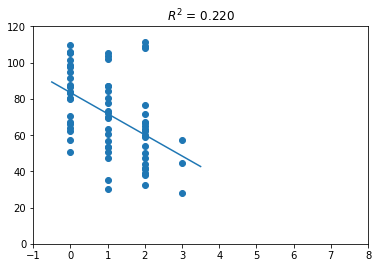

In [59]:
a = LinearRegression().fit(_dcount.reshape((len(_dcount), 1)), _depth)
R_2 = a.score(_dcount.reshape((len(_dcount), 1)), _depth)

plt.scatter(_dcount, _depth)
plt.plot(np.linspace(-0.5,3.5, 1000), np.linspace(-0.5,3.5, 1000) * a.coef_[0] + a.intercept_)

plt.title('$R^2$ = %.3f'%R_2)
plt.xlim((-1, 8))
plt.ylim((0, 120))